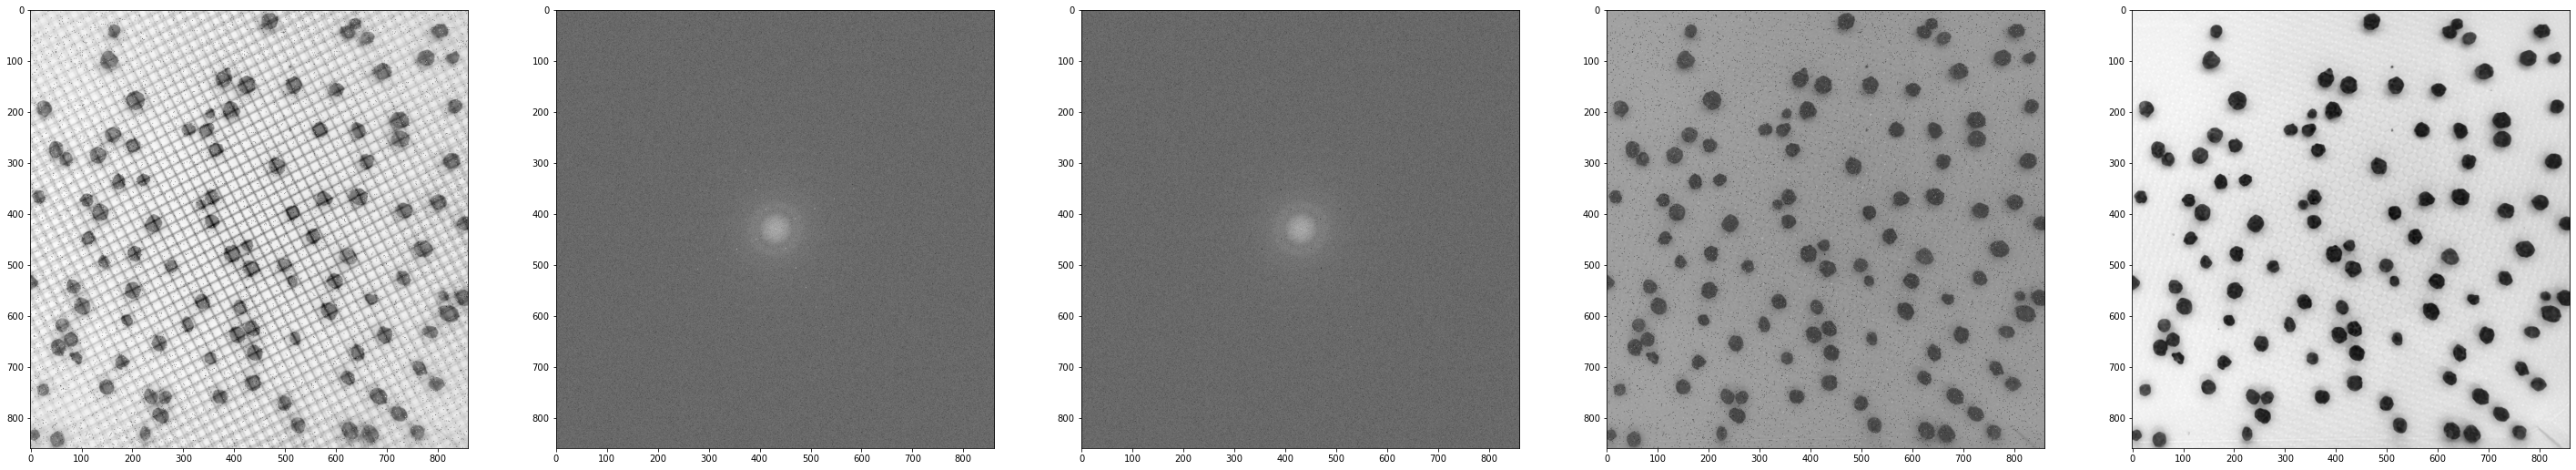

In [37]:
import numpy as np
from scipy import ndimage as ndim
import skimage.morphology
import skimage.io
from scipy.ndimage import median_filter
from skimage.morphology.selem import disk
from skimage import filters
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.feature import peak_local_max

plt.rcParams['image.cmap'] = 'gray'  # change default colormap

fig, ax = plt.subplots(ncols=5, figsize=(50, 10))

input_image = skimage.io.imread("./img/input.tif")

# input_image_grey = rgb2gray(input_image)
input_image_grey = input_image
ax[0].imshow(input_image_grey)
# fft
input_image_fft = np.fft.fftshift(np.fft.fft2(input_image_grey))
# ax[2].imshow(np.log(abs(input_image_fft)), cmap='gray')
ax[1].imshow(np.log(abs(input_image_fft)), cmap='gray')
radius = 12
center = 430

input_image_fft_edit = input_image_fft
for x in range(int(np.sqrt(input_image_fft_edit.size))):
    for y in range(int(np.sqrt(input_image_fft_edit.size))):
        if ((x > center + radius or x < center - radius and (y > center + radius or y < center - radius))
                and (y > center + radius or y < center - radius and (x > center + radius or x < center - radius))):
            if (np.log(abs(input_image_fft_edit[x, y])) > 13.5):
                input_image_fft_edit[x, y] = np.complex128(255)

ax[2].imshow(np.log(abs(input_image_fft_edit)), cmap='gray')

input_image_ifft = abs(np.fft.ifft2(input_image_fft))
ax[3].imshow(input_image_ifft, cmap='gray')

median_img = median_filter(input_image_ifft, 4)
ax[4].imshow(median_img)


Threshold at: 161.3748673342388
110


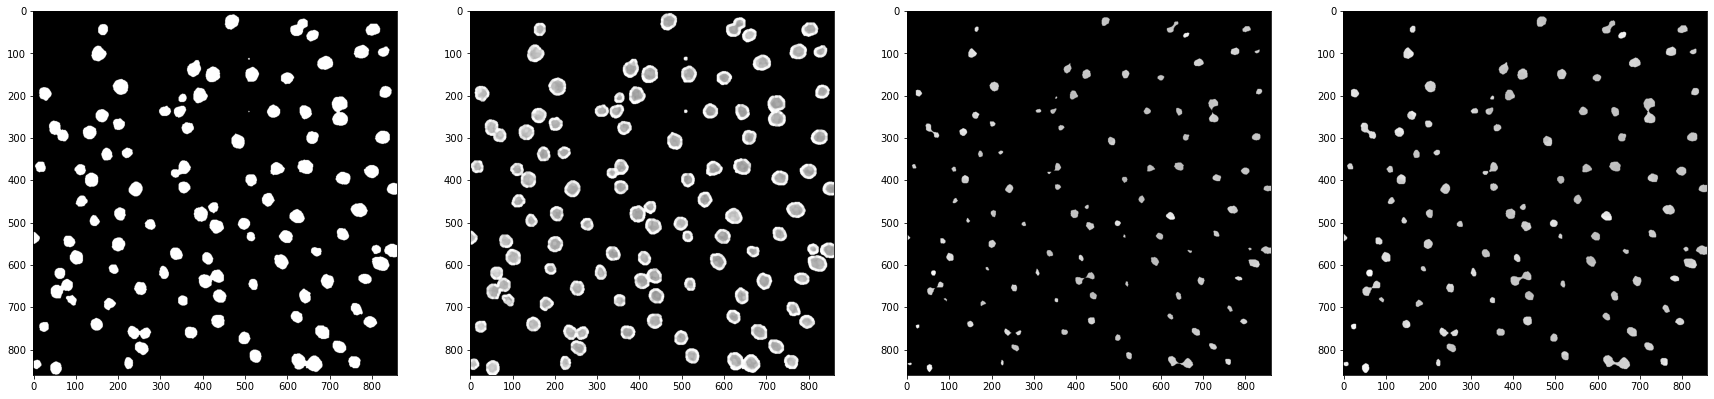

In [38]:
treshold = filters.threshold_otsu(median_img)
print("Threshold at: {}".format(treshold))

fig, ax = plt.subplots(ncols=4, figsize=(30,10))

binary_mask = median_img < treshold
ax[0].imshow(binary_mask)

# use the binary_mask to remove the background
masked_img = np.zeros_like(median_img)
masked_img[binary_mask] = median_img[binary_mask]

erosion_radius = 10.5

erosion_img = skimage.morphology.dilation(masked_img, disk(erosion_radius/3))
ax[1].imshow(erosion_img)
erosion_img = skimage.morphology.erosion(erosion_img, disk(erosion_radius))
ax[2].imshow(erosion_img)
erosion_img = skimage.morphology.dilation(erosion_img, disk(erosion_radius/4))
ax[3].imshow(erosion_img)

min_d = 5

distance = ndim.distance_transform_edt(erosion_img)
coordinates = peak_local_max(distance, min_distance=min_d)
print(len(coordinates))